# Get data from Tropomi (S5P) satellite and data analisis

In this Notebook we will develop a code for get an anaice data from S5p also we will 
learn abot print thos data at gmap usin lbraries like Geemap, geopandas and Earth engine api.

sugegsted links: 
- https://courses.spatialthoughts.com/end-to-end-gee.html#earth-engine-objects


First we eil import and initializate the GEE api

In [2]:
import ee
import geemap
import geopandas as gdp
from ipyleaflet import GeoJSON
from zipfile import ZipFile
from geeS2downloader import GEES2Downloader
#ee.Authenticate()
ee.Initialize()


Now we will create a ImageCollection from S5P sensor, you could choose beetwen the following 
layers:


In [5]:
# Aviable layers:
# Se define la region de interes
# xMin = -65.654297
# yMin = -4.954507
# xMax = -82.573242
# yMax = 13.330474
# region = ee.Geometry.Rectangle(yMin, xMin,yMax, xMax)
# aoi1= ee.Geometry.Point([-74, 4.6])

methane = "COPERNICUS/S5P/OFFL/L3_CH4"
Municipios= ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level2")#Datos de fronteras a nivel municipal
Dep = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level1")#Filto de los anteriores datos para Colombia
Dep_col=Dep.filter(ee.Filter.eq('ADM0_NAME', 'Colombia'))#Datos de fronteras a nivel departamental
Mun_col=Municipios.filter(ee.Filter.eq('ADM0_NAME', 'Colombia'))#Filtro de los anteriores datos para Colombia
Fronteras=ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0")#Datos de fronteras nacionales
Front_col=Fronteras.filter(ee.Filter.eq('ADM0_NAME', 'Colombia'))#Filtro de los anteriores datos para Colombia

image1 = ee.ImageCollection(methane).select("CH4_column_volume_mixing_ratio_dry_air_bias_corrected").filterDate('2022-09-01', '2022-12-01')
imageC=ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_CLOUD").select('cloud_fraction').filterDate('2022-09-01', '2022-12-01')

imageNO2 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2022-09-01', '2022-12-01');

imageSO2=ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_SO2").select('SO2_column_number_density').filterDate('2022-09-01', '2022-12-01');


# Map.setCenter(65.27, 24.11, 4);
#img_col= image1.first()
img1 = image1.mean()
img_col=img1.clip(Front_col)
imageC_col=imageC.mean()
img_col2=imageC_col.clip(Front_col)
#img_col = image1.first()

img_col_SO2=imageSO2.mean().clip(Front_col)
band_viz = {
    'min': 1850,
    'max': 2000,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

    
Map = geemap.Map(center=(4.6,-74),zoom=5)
#ap.setCenter(-74.297333, 4.570868,5)
#Map = geemap.Map(center=(-23, -48.4), zoom=9)

#Map.setCenter(-74.297333, 4.570868,5)
imageNO2.getInfo()

{'type': 'ImageCollection',
 'bands': [],
 'id': 'COPERNICUS/S5P/OFFL/L3_NO2',
 'version': 1678647345158782,
 'properties': {'system:visualization_0_min': '0.0',
  'type_name': 'ImageCollection',
  'keywords': ['air_quality',
   'copernicus',
   'esa',
   'eu',
   'knmi',
   'nitrogen_dioxide',
   'no2',
   'pollution',
   's5p',
   'sentinel',
   'tropomi'],
  'thumb': 'https://mw1.google.com/ges/dd/images/COPERNICUS_S5P_OFFL_NO2_thumb.png',
  'description': '<h3 id="offll3_no2">OFFL/L3_NO2</h3><p>This dataset provides offline high-resolution imagery of NO<sub>2</sub> concentrations.</p><p>Nitrogen oxides (NO<sub>2</sub> and NO) are important trace gases in the Earth’s atmosphere,\npresent in both the troposphere and the stratosphere. They enter the atmosphere\nas a result of anthropogenic activities (notably fossil fuel combustion and\nbiomass burning) and natural processes (wildfires, lightning, and microbiological processes in\nsoils). Here, NO<sub>2</sub> is used to represent conc

In [9]:

Dep_col_s = Dep_col.style(fillColor='#FFFFFF80',
  width= 1.2)

Front_col_s = Front_col.style(  fillColor='b5ffb4',
  width=2);

#Map.addLayer(Front_col_s, {}, 'Colombia',True,0.5)

#Map.addLayer(img_col, band_viz, 'methane',True,1)
#Map.addLayer(img_col2, {'min': 0,'max': 0.75,
#    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
#}, 'clouds',True,0.7)
#Map.addLayer(imageNO2.mean().clip(Front_col), {
 # 'min': 0,
  #'max': 0.00005,
  #'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}, 'S5P N02',True,0.7);

Map.addLayer(img_col_SO2, {
  'min': 0,
  'max': 0.0005,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}, 'S5P S02',True,0.7);
Map.addLayer(Dep_col_s, {}, 'Departamentos',True,0.4)
#Map.addLayer(dataset, {}, 'Second Level Administrative Units',True,0.2)

Map

Map(bottom=18800.0, center=[-22.630236515135216, -51.663147653822826], controls=(WidgetControl(options=['posit…

In [4]:
Map1 = geemap.Map(center=(4.6,-74),zoom=5)
Map1.addLayer(imageNO2.mean().clip(Front_col), {
  'min': 0,
  'max': 0.00005,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}, 'S5P N02',True,0.7);
Map1.addLayer(Dep_col_s, {}, 'Departamentos',True,0.4)
Map1

Map(center=[4.6, -74], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [6]:
Map2 = geemap.Map(center=(4.6,-74),zoom=5)
Front_Yem=Fronteras.filter(ee.Filter.eq('ADM0_NAME', 'Yemen'))
img_y=img1.clip(Front_Yem)
Map2.addLayer(img1, band_viz, 'methane',True,0.7);
Map2.addLayer(Front_Yem, {}, 'Frontera',True,0.4)
#Map2.addLayer(Dep_col_s, {}, 'Departamentos',True,0.4)
Map2

Map(center=[4.6, -74], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

In [7]:
Map3 = geemap.Map(center=(4.6,-74),zoom=5)
Map3.addLayer(imageC, {'min': 0,'max': 0.5,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}, 'clouds',True,0.7)
Map3.addLayer(Dep_col_s, {}, 'Departamentos',True,0.4)
Map3

Map(center=[4.6, -74], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [314]:
#image1.getRegion(Front_col,scale=1).getInfo()
downloader = GEES2Downloader()

# call download method passing image and band (1 band at a time on this version)
downloader.download(img=img_d, band='CH4_column_volume_mixing_ratio_dry_air_bias_corrected')

Retrieving band info


KeyError: 'max'

In [8]:
aoi = ee.Geometry.Point([-48.4, -23])

clouds = ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY').filterDate('2019-11-25', '2019-11-28').filterBounds(aoi)

#img = s2.first()
cld = clouds.first()
Map = geemap.Map(center=(-23, -48.4), zoom=9)
Map.addLayer(cld, {'min': 0, 'max': 100, 'palette': ['purple', 'yellow']}, 'Cloud Probability', True, 1)
Map

Map(center=[-23, -48.4], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=…

In [281]:


# styleParams = {
#   fillColor: 'b5ffb4',
#   color: '00909F',
#   width: 1.0,
# };
cld.getInfo()

{'type': 'Image',
 'bands': [{'id': 'probability',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 255},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

TraitError: The 'east' trait of a Map instance expected a float, not the NoneType None.

In [142]:
# dataset = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0");

# Map.setCenter(7.82, 49.1, 4);

# styleParams = {
#   fillColor='b5ffb4',
#   color='00909F',
#   width=1.0,
# }

# dataset = dataset.style(  fillColor='b5ffb4',
#   color='00909F',
#   width=2,);

Map.addLayer(dataset, {}, 'Country Boundaries',True,0.05);
Map

Map(bottom=1705.0, center=[49.1, 7.82], controls=(WidgetControl(options=['position', 'transparent_bg'], widget…

Map(bottom=8249.0, center=[5.331644153439766, -74.61914062500001], controls=(WidgetControl(options=['position'…

In [80]:
extrema = image.reduce(ee.Reducer.mean())
plane_data=extrema.reduceToVectors()
plane_data.getInfo()
data=ee.batch.Export.table.toDrive(plane_data,fileFormat='GeoJSON')
# data?

EEException: Image.reduceToVectors: Provide 'geometry' parameter when aggregating over an unbounded image.

In [225]:
datai=image.toArray()
plane_data=datai.reduceToVectors()
#print(plane_data.getArray('name'))

import a shapefile and create his layer:
https://geemap.org/notebooks/65_vector_styling/#use-add_styled_vector

In [19]:
departamentos = ee.FeatureCollection('users/hmojica/data/departamentos')
style = {'color': '000000', 'width': 2, 'lineType': 'solid', 'fillColor': '00000000'}
Map.addLayer(departamentos.style(**style), {}, "Departamentos")



#### ee.ImageCollection.mean
Reduces an image collection by calculating the mean of all values at each pixel across the stack of all matching bands. Bands are matched by name.

In [9]:
band_viz = {
    'min': 1750,
    'max': 1900,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
Map.addLayer(image.mean(), band_viz, 'methane')
Map.setCenter(-74.297333, 4.570868, 5);

# Se define la region de interes
xMin = -65.654297
yMin = -4.954507
xMax = -82.573242
yMax = 13.330474
region = ee.Geometry.Rectangle([
    [xMin, yMin],
    [xMax, yMax]
  ])

In [90]:
# se obtiene las coordenadas de la región dibujndo la region con un poligono
#region = Map.user_roi #.getInfo()
#print(region)
mean=image.mean()
type(mean.toArray())

ee.image.Image

In [11]:
#Map.addLayer(image.mean(), band_viz, 'S5P Cloud')
#geemap.clip_image(Map, region, Map)


El resultado de dibujar el poligono y obtener las coordenadas es un json:

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -82.573242,
              -4.954507
            ],
            [
              -82.573242,
              13.330474
            ],
            [
              -65.654297,
              13.330474
            ],
            [
              -65.654297,
              -4.954507
            ],
            [
              -82.573242,
              -4.954507
            ]
          ]
        ]
      }
    }
  }
})


In [14]:
# Mosaic the visualization layers and display (or export).
mosaic = image.mosaic()
# Map.addLayer(mosaic, {}, 'mosaic', False)

# Create a circle by drawing a 20000 meter buffer around a point.
clipped = mosaic.clip(region)

# Display a clipped version of the mosaic.
band_viz = {
    'min': 0,
    'max': 0.95,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
Map.addLayer(clipped, band_viz, 'Clipped image')

# Display the map
Map

Map(bottom=4292.0, center=[4.570868, -74.297333], controls=(WidgetControl(options=['position', 'transparent_bg…

In [12]:
ee.Export?

Object `ee.Export` not found.


In [3]:
shp=gdp.read_file('EEZ_land_union_v3_202003/EEZ_Land_v3_202030.shp')
num_df.loc[num_df['a'] == 2]

<AxesSubplot: >

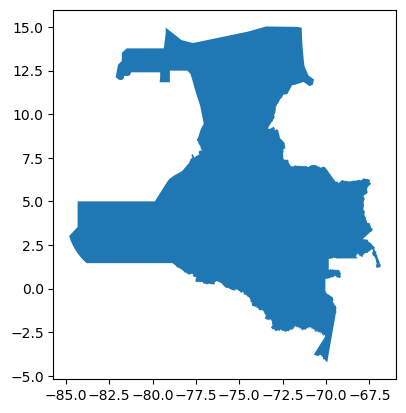

In [12]:
# var shp=ee.FeatureCollection(polygon);
# var colombiam=shp.filter(ee.Filter.eq('UNION', 'Colombia'));
# //Map.addLayer(colombiam,{})
# Map
shp.loc[shp['UNION']=='Colombia'].plot()

In [7]:
shp['TERRITORY1'].unique()

array(['Estonia', 'Mayotte', 'Qatar', 'Cameroon', 'Finland',
       'Bassas da India', 'Faeroe', 'Gilbert Islands', 'Colombia',
       'Nigeria', 'Pakistan', 'Syria', 'Kenya', 'Philippines', 'Bahrain',
       'British Virgin Islands', 'Cuba', 'Johnston Atoll', 'Guyana',
       'Seychelles', 'Phoenix Group', 'China', 'Equatorial Guinea',
       'Vietnam', 'Matthew and Hunter Islands', 'Panama', 'Ile Tromelin',
       'Gabon', 'Sao Tome and Principe', 'North Korea', 'Saba',
       'Northern Mariana Islands', 'Kuril Islands', 'Senegal', 'Jordan',
       'Palestine', 'Saudi Arabia', 'Serranilla Bank', 'French Guiana',
       'Senkaku Islands', 'Hawaii', 'Iran', 'Crozet Islands', 'Georgia',
       'Guinea-Bissau', 'Turks and Caicos Islands', 'Mauritania',
       'Micronesia', 'New Caledonia', 'Mexico', 'Portugal',
       'Wallis and Futuna', 'Macquarie Island', 'Saint Kitts and Nevis',
       'United Arab Emirates', 'Saint Helena', 'Doumeira Islands',
       'United Kingdom', 'Uruguay', 'Th

In [ ]:
#Código en Java para consol de gee


# var shp=ee.FeatureCollection(polygon);
# var Front_col=shp.filter(ee.Filter.eq('UNION', 'Colombia'));
# var Front_col_s = Front_col.style({fillColor : 'b5ffb4',
#   width: 2})
# Map.addLayer(Front_col_s,{},'Frontera',1,0.2)
# var methane = "COPERNICUS/S5P/OFFL/L3_CH4"
# //var Municipios= ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level2")#Datos de fronteras a nivel municipal
# //Dep = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level1")#Filto de los anteriores datos para Colombia
# //Dep_col=Dep.filter(ee.Filter.eq('ADM0_NAME', 'Colombia'))#Datos de fronteras a nivel departamental
# //Mun_col=Municipios.filter(ee.Filter.eq('ADM0_NAME', 'Colombia'))#Filtro de los anteriores datos para Colombia
# //Fronteras=ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0")#Datos de fronteras nacionales
# //Front_col=Fronteras.filter(ee.Filter.eq('ADM0_NAME', 'Colombia'))#Filtro de los anteriores datos para Colombia
# var s_date='2022-08-09' 
# var e_date='2023-02-09'
# var image1 = ee.ImageCollection(methane).select("CH4_column_volume_mixing_ratio_dry_air_bias_corrected").filterDate(s_date,e_date)
# var imageC=ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_CLOUD").select('cloud_fraction').filterDate(s_date,e_date)

# var imageNO2 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate(s_date,e_date);

# var imageSO2=ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_SO2").select('SO2_column_number_density').filterDate(s_date,e_date);


# // Map.setCenter(65.27, 24.11, 4);
# //img_col= image1.first()
# var img1 = image1.mean()
# var img_col=img1.clip(Front_col)
# var imageC_col=imageC.mean()
# var img_col2=imageC_col.clip(Front_col)
# //img_col = image1.first()
# var img_col_NO2=imageNO2.mean().clip(Front_col)
# var img_col_SO2=imageSO2.mean().clip(Front_col)
# var band_viz = {
#     'min': 1850,
#     'max': 2000,
#     'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
# }

    
# //Map = geemap.Map(center=(4.6,-74),zoom=5)
# //ap.setCenter(-74.297333, 4.570868,5)
# //Map = geemap.Map(center=(-23, -48.4), zoom=9)

# //Map.setCenter(-74.297333, 4.570868,5)
# //imageNO2.getInfo()
# Map.addLayer(img_col,band_viz,'Methane')
# Map.addLayer(img_col2,{'min': 0,'max': 1,
#     'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
# },'Clouds')
# Map.addLayer(img_col_SO2,{
#   'min': 0,
#   'max': 0.0005,
#   'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']},'SO2',1,0.7)
# Map.addLayer(img_col_NO2,{
#   'min': 0,
#   'max': 0.00005,
#   'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}, 'S5P N02',1,0.9)
# Map